In [1]:
from scipy.io import netcdf, loadmat
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
from python_functions import *
sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
#sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [326]:
run_ERA_tempcorr0 = MonitorRead()
run_ERA_tempcorr0.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000,3110400,3628800,4147200,4665600,5184000,5702400,6220800,6739200,7257600,7776000,8294400,8812800,9331200,9849600,10368000,10886400,11404800,11923200])
#run_ERA_tempcorr0.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000,3110400,3628800,4147200,4665600,5184000,5702400,6220800,6739200,7257600,7776000,8294400,8812800])
run_ERA_tempcorr0.title('ERA run with OBS*0.5','grey')

#run_ERA_tempcorr1 = MonitorRead()
#run_ERA_tempcorr1.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs1/results/',[0,518400,1036800])
#run_ERA_tempcorr1.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs1/results/',[0,518400,1036800])
#run_ERA_tempcorr1.title('ERA run with OBS*0.8','cyan')

#run_ERA_tempcorr2 = MonitorRead()
#run_ERA_tempcorr2.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs2/results/',[0,518400,1036800])
#run_ERA_tempcorr2.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs2/results/',[0,518400,1036800])
#run_ERA_tempcorr2.title('ERA run with OBS*0.65','magenta')

run_18km = MonitorRead()
run_18km.readData('/hpcdata/scratch/am8e13/arctic420x384/run_tempcorr/results/',[0,311040,622080,933120,1244160,1555200,1814400,2125440,2436480,2643840,2954880,3265920,3576960,3888000,4199040,4510080,4821120,5132160,5443200,5754240,6065280,6376320,6687360])
#run_18km.readDynStDiag('/hpcdata/scratch/am8e13/arctic420x384/run_tempcorr/results/',[0,311040,622080,933120,1244160,1555200,1814400,2125440,2436480,2643840,2954880,3265920,3576960,3888000,4199040,4510080,4821120,5132160])
run_18km.title('18km simul','red')#3784320,

#run_9km = MonitorRead()
#run_9km.readData('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/',[0,138240,276480,414720,552960,691200])
#run_9km.readDynStDiag('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/',[0,138240,276480,414720,552960,691200])
#run_9km.title('9km simul','blue')

In [327]:
titles = {'theta_mean' : 'Temperature Mean', 'theta_min' : 'Temperature Min', 'theta_max' :  'Temperature Max', \
            'eta_mean' : 'ETA mean', 'eta_max' : 'ETA max', 'eta_min' : 'ETA min', 'salt_mean' : 'Salinity Mean' , \
            'salt_max' : 'Salinity Max' , 'salt_min' : 'Salinity Min' , 'sss_mean': 'SSS mean' , \
            'sss_max' : 'SSS max', 'sss_min' : 'SSS min', 'sst_mean' : 'SST mean', 'sst_max' : 'SST max' , \
            'sst_min' : 'SST min', 'vvel_mean' : 'V mean', 'vvel_max' : 'V max' , 'vvel_min' : 'V min', \
            'uvel_mean' : 'U mean', 'uvel_max' : 'U max', 'uvel_min' : 'U min', 'ke_mean' : 'Kinetic mean', \
            'ke_max' : 'Kinetic max', 'ke_vol' : 'Kinetic volume', 'seaice_area_max' : 'Seaice area max', \
            'seaice_area_min' : 'Seaice area min', 'seaice_area_mean' : 'Seaice area mean', \
            'seaice_heff_max' : 'Seaice thickness max', 'seaice_heff_min' : 'Seaicea thickness max', \
            'seaice_heff_mean' : 'Seaice thickness mean', 'time_seconds' : 'Time seconds' , \
          'time_years' : 'Time years'} 
unity = {'theta_mean' : 'C', 'theta_min' : 'C', 'theta_max' :  'C', \
            'eta_mean' : 'm', 'eta_max' : 'm', 'eta_min' : 'm', 'salt_mean' : 'psu' , \
            'salt_max' : 'psu' , 'salt_min' : 'psu' , 'sss_mean': 'psu' , \
            'sss_max' : 'psu', 'sss_min' : 'psu', 'sst_mean' : 'C', 'sst_max' : 'C' , \
            'sst_min' : 'C', 'vvel_mean' : 'm/s', 'vvel_max' : 'm/s' , 'vvel_min' : 'm/s', \
            'uvel_mean' : 'm/s', 'uvel_max' : 'm/s', 'uvel_min' : 'm/s', 'ke_mean' : 'm^2/s^2', \
            'ke_max' : 'm^2/s^2', 'ke_vol' : 'm^2/s^2', 'seaice_area_max' : '%', \
            'seaice_area_min' : '%', 'seaice_area_mean' : '%', \
            'seaice_heff_max' : 'm', 'seaice_heff_min' : 'm', \
            'seaice_heff_mean' : 'm', 'time_seconds' : 's' , \
          'time_years' : 'Years'} 
time = {'theta_mean' : 'time_years', 'theta_min' : 'time_years', 'theta_max' :  'time_years', \
        'eta_mean' : 'time_years', 'eta_max' : 'time_years', 'eta_min' : 'time_years', \
        'salt_mean' : 'time_years' , 'salt_max' : 'time_years' , 'salt_min' : 'time_years' , \
        'sss_mean': 'time_years' , 'sss_max' : 'time_years', 'sss_min' : 'time_years', \
        'sst_mean' : 'time_years', 'sst_max' : 'time_years' ,'sst_min' : 'time_years', \
        'vvel_mean' : 'time_years', 'vvel_max' : 'time_years' , 'vvel_min' : 'time_years', \
        'uvel_mean' : 'time_years', 'uvel_max' : 'time_years', 'uvel_min' : 'time_years', \
        'ke_mean' : 'time_years', 'ke_max' : 'time_years', 'ke_vol' : 'time_years', \
        'seaice_area_max' : 'time_years_ice', 'seaice_area_min' : 'time_years_ice', \
        'seaice_area_mean' : 'time_years_ice', 'seaice_heff_max' : 'time_years_ice', \
        'seaice_heff_min' : 'time_years_ice', 'seaice_heff_mean' : 'time_years_ice'} 

titles_lv = { 
                'run_ERA_tempcorr0' : 'ERA run with OBS*0.5' , 'run_JRA_tempcorr0' : 'JRA run with OBS*0.5', \
                'run_ERA_tempcorr1' : 'ERA run with OBS*0.8' , 'run_JRA_tempcorr1' : 'JRA run with OBS*0.8', \
                'run_ERA_tempcorr2' : 'ERA run with OBS*0.65' , 'run_JRA_tempcorr2' : 'JRA run with OBS*0.65',\
                'run_18km' : 'run 18km' , 'run_9km' : 'run 9km'  
            }

In [328]:
monitor_list1 = {#'run_ERA_noobs' : run_ERA_noobs , 'run_ERA_notempobs' : run_ERA_notempobs , \
               #'run_JRA_first' : run_JRA_first ,  'run_JRA_noobs' : run_JRA_noobs , \
               #'run_ERA_obsonchucky' : run_ERA_obsonchucky , 'run_ERA1' : run_ERA1, \
               'run_ERA_tempcorr0' : run_ERA_tempcorr0 , \
               # 'run_ERA_tempcorr1' : run_ERA_tempcorr1, \
               #'run_ERA_tempcorr2' : run_ERA_tempcorr2 , \
               # 'run_JRA_tempcorr0' : run_JRA_tempcorr0, \
               #'run_JRA_tempcorr1' : run_JRA_tempcorr1 , \
               # 'run_JRA_tempcorr2' : run_JRA_tempcorr2, \
               #'run_PHC' : run_PHC , 'run_WOA' : run_WOA,\
               # 'run_PHC_tempcorr0' : run_PHC_tempcorr0 , 'run_WOA_tempcorr0' : run_WOA_tempcorr0,\
               # 'run_PHC_tempcorr1' : run_PHC_tempcorr1 , 'run_WOA_tempcorr1' : run_WOA_tempcorr1,\
               # 'run_PHC_tempcorr2' : run_PHC_tempcorr2 , 'run_WOA_tempcorr2' : run_WOA_tempcorr2
               'run_18km' : run_18km ,\
               #'run_9km' : run_9km 
}
#monitor_list = ['run_ERA_tempcorr0','run_JRA_tempcorr0','run_ERA_tempcorr1','run_JRA_tempcorr1',\
#                'run_ERA_tempcorr2','run_JRA_tempcorr2']
mon = {'run_18km':run_18km , }

ERA run with OBS*0.5 grey
18km simul red
ERA run with OBS*0.5 grey
18km simul red
ERA run with OBS*0.5 grey
18km simul red


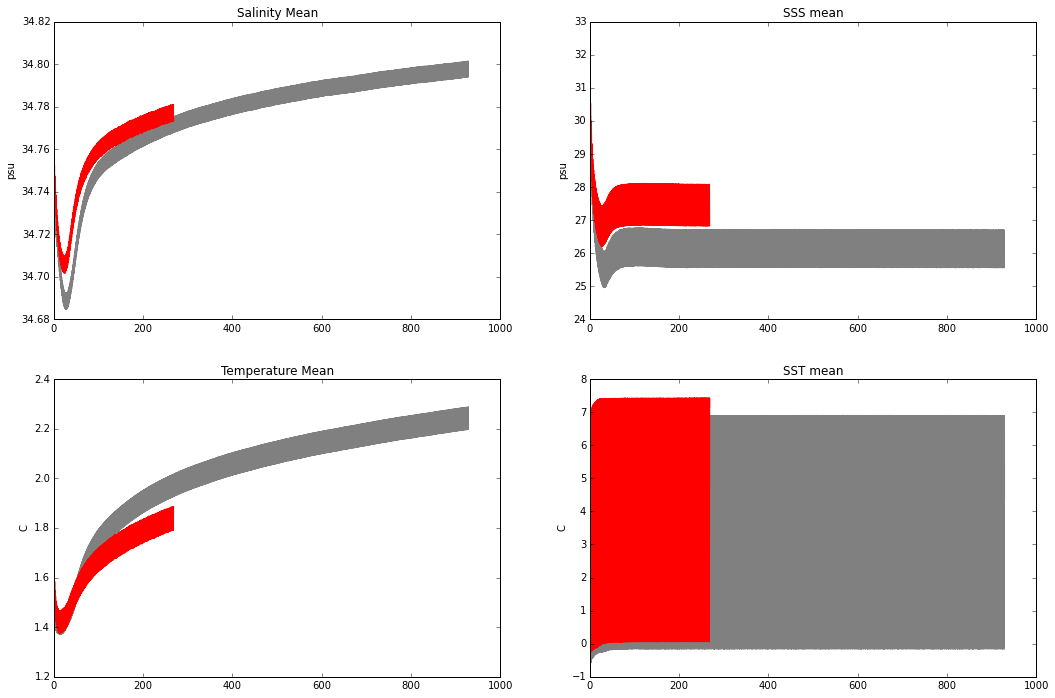

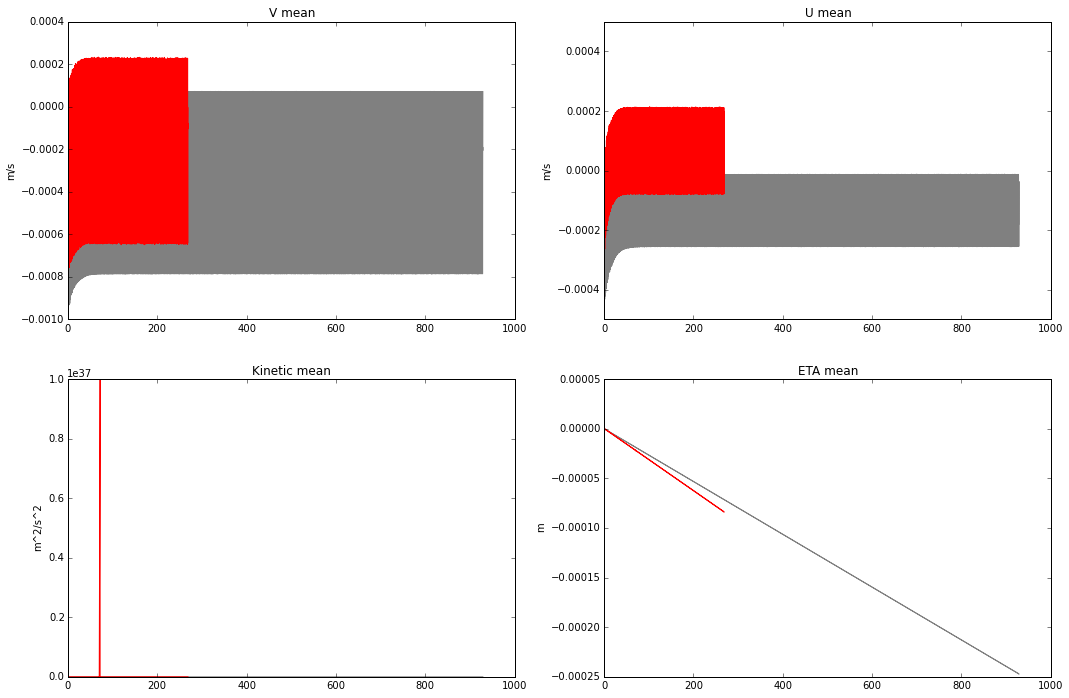

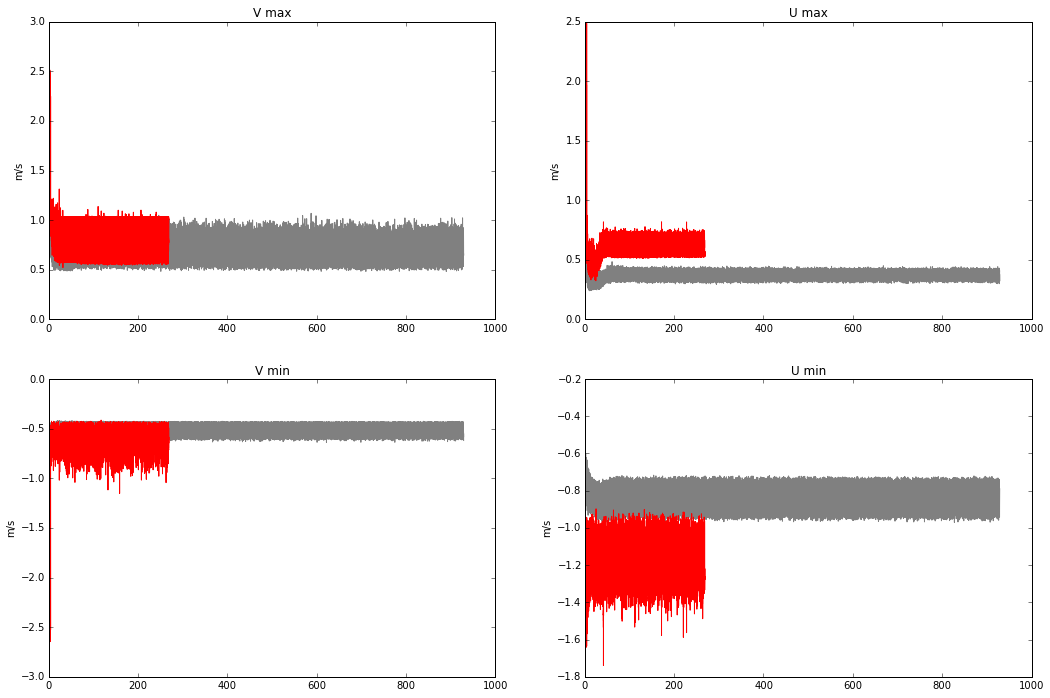

In [329]:
plot_monitor(monitor_list1,['salt_mean','sss_mean','theta_mean','sst_mean'])
plot_monitor(monitor_list1,['vvel_mean','uvel_mean','ke_mean','eta_mean'])
plot_monitor(monitor_list1,['vvel_max','uvel_max','vvel_min','uvel_min'])

#plot_monitor(monitor_list1,['seaice_area_mean','seaice_heff_mean','seaice_heff_max','seaice_heff_min'])

In [6]:
time_new2_eta = [182, 186, 192 ,198, 214, 240]
print time_new2_eta
time_new18_eta = [364, 378, 390, 400, 430, 490]
print time_new18_eta

[182, 186, 192, 198, 214, 240]
[364, 378, 390, 400, 430, 490]


In [7]:
file2read = netcdf.NetCDFFile("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/state.nc",'r')
run_pert2_ETA = file2read.variables['Eta']
run_pert2_ETA = run_pert2_ETA[time_new2_eta]*1
run_pert2_time = file2read.variables['T']
run_pert2_time = run_pert2_time[time_new2_eta]*1
time2_0 = file2read.variables['T']
time2_0 = time2_0[0]*1

In [8]:
file2read = netcdf.NetCDFFile("/hpcdata/scratch/am8e13/arctic420x384/run_perturbation/results/state.nc",'r')
run_pert18_ETA = file2read.variables['Eta']
run_pert18_ETA = run_pert18_ETA[time_new18_eta]*1
run_pert18_time = file2read.variables['T']
run_pert18_time = run_pert18_time[time_new18_eta]*1
time18_0 = file2read.variables['T']
time18_0 = time18_0[0]*1

In [9]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results36km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
bathy2=file2read.variables['HFacC']
bathy2=bathy2[:]*1

# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results18km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
bathy18=file2read.variables['HFacC']
bathy18=bathy18[:]*1

In [10]:
run_pert2_ETA[:,bathy2[0,:,:]==0] = np.nan
run_pert18_ETA[:,bathy18[0,:,:]==0] = np.nan

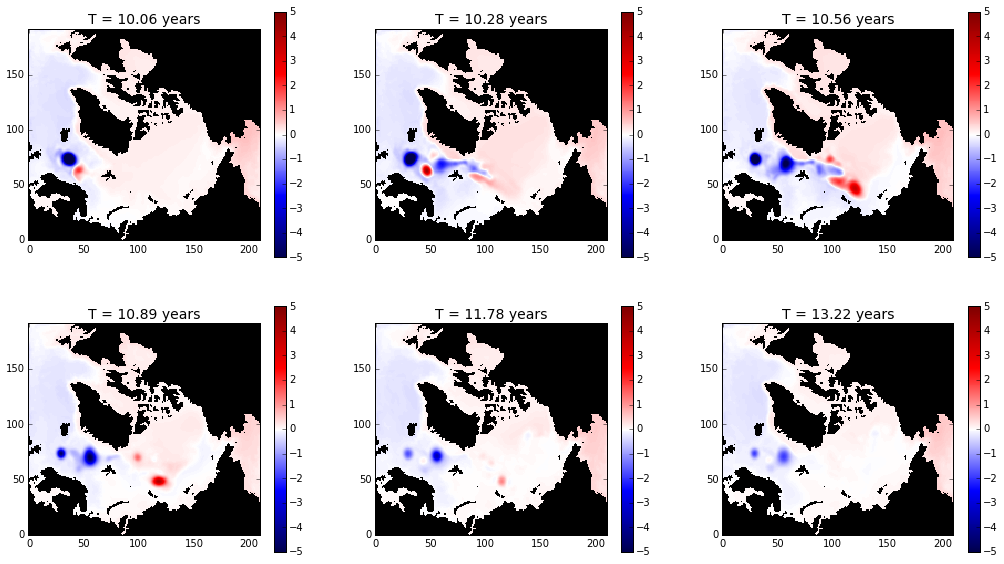

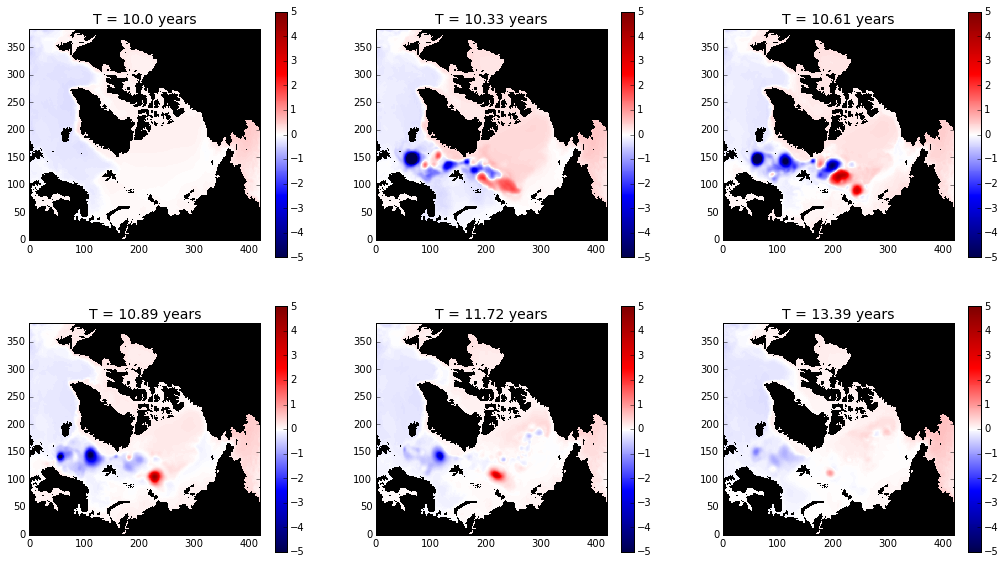

In [11]:
plot_field(run_pert2_ETA,(run_pert2_time - time2_0)/(60*60*24*360),-5,5,matplotlib.cm.seismic,'black','')
plot_field(run_pert18_ETA,(run_pert18_time - time18_0)/(60*60*24*360),-5,5,matplotlib.cm.seismic,'black','')

In [7]:
file2read = netcdf.NetCDFFile("/hpcdata/scratch/am8e13/arctic420x384/run_tempcorr/toglue/state.nc",'r')
run_pert18_ETA = file2read.variables['S']
run_pert18_ETA = run_pert18_ETA[0,:,:,:]*1
run_pert18_time = file2read.variables['T']
run_pert18_time = run_pert18_time[0]*1

In [8]:
run_pert18_time/(60*60*24*360)

198.0

In [ ]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results9km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
bathy2=file2read.variables['HFacC']
bathy2=bathy2[:]*1

In [191]:
#name = '/hpcdata/scratch/am8e13/run_template_9km/SALT_840x768_from18km'
name = '/noc/users/am8e13/MITgcm_mio/SALT_840x768_from18km'
data = komod.mitbin(name,xdim=768,ydim=840,zdim=50,datatype='float32')
#name = '/hpcdata/scratch/am8e13/run_template_9km/SALT_840x768_from18km_mod'
name = '/noc/users/am8e13/MITgcm_mio/SALT_840x768_from18km_mod'
data_mod = komod.mitbin(name,xdim=768,ydim=840,zdim=50,datatype='float32')
#name = '/hpcdata/scratch/am8e13/run_template_9km/SALT_840x768_from18km_mod'
name = '/hpcdata/scratch/am8e13/run_template_9km/run_template/WOA05_SALT_JAN_840x768x50_arctic'
data_init = komod.mitbin(name,xdim=768,ydim=840,zdim=50,datatype='float32')
#data[0,bathy2==0]=np.nan
#data_mod[0,bathy2==0]=np.nan

In [130]:
data_9 = StateRead()
data_9.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/",[0,1,2,3])
#data_ERA_tempmod0.title('ERA run with Obs*0.5')

In [289]:
data_9 = StateRead()
data_9.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/",[0,1,2,3])
#data_ERA_tempmod0.title('ERA run with Obs*0.5')
data_9new = StateRead()
data_9new.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/",[0,1])
#data_ERA_tempmod0.title('ERA run with Obs*0.5')

In [102]:
data_9old = StateRead()
data_9old.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/oldrun/",[0,1,2,3,4])

In [103]:
data_9ne = StateRead()
data_9ne.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/nerun/",[0,1,2,3,4,5,6,7])

In [2]:
def interact(field,cmap1,vimin1,vimin2,vimax1,vimax2,time1,time2,z1,z2):
    def plot_field2(vimin=1,vimax=20,time=0,Z=0):
        # This function plots a 2D field, the field is meant to have NaNs on the land place                                                
        # vimin is the minimun, vimax is the maximum, setbad is the NaN color, unity is the unity in the colorbar                          
        # cmap is a colomap                                                                                                               
        fig,axes = plt.subplots(1,1)
        masked_array = np.ma.array(field[time,Z,:,:], mask=np.isnan(field[time,Z,:,:]))
        cmap= cmap1
        cmap.set_bad('grey',1.)
        ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca )
        fig.subplots_adjust(right=2.4,top=2)
        return plot_field2
        
    w = interactive(plot_field2,vimin=(vimin1,vimin2),vimax=(vimax1,vimax2),time=(time1,time2),Z=(z1,z2))
    display(w)
#interact(data_9old.data['T'][:,:,:,:],matplotlib.cm.jet,-1,30,0,40,time1=0,time2=3,z1=0,z2=50)

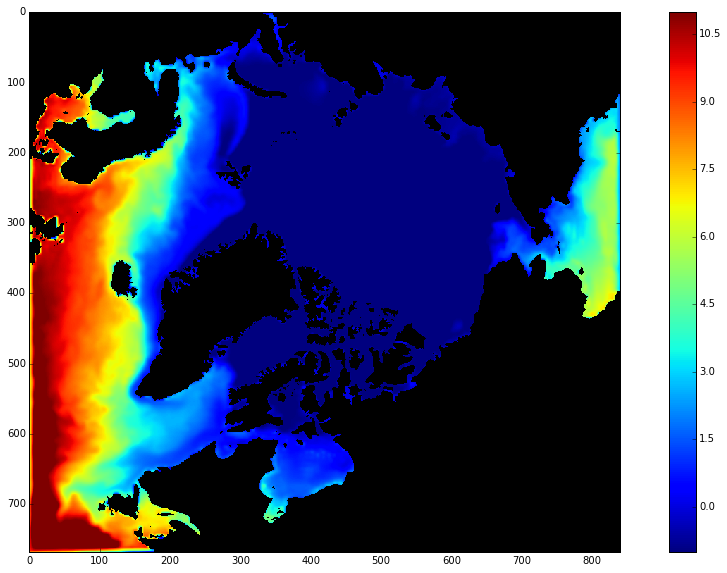

In [9]:
interact(data_9ne.data['T'][:,:,:,:],matplotlib.cm.jet,-1,30,0,40,time1=0,time2=7,z1=0,z2=50)

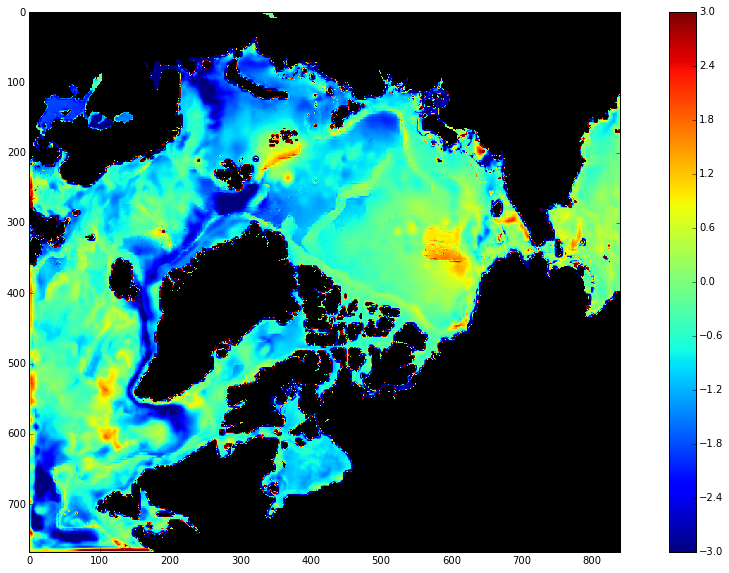

In [12]:
interact(data_9ne.data['S'][0:5,:,:,:] - data_9old.data['S'][:,:,:,:],matplotlib.cm.jet,-3,30,0,40,time1=0,time2=5,z1=0,z2=50)

In [43]:
data_9ne = StateRead()
data_9ne.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/nerun/",[0,1,2,3,4,5,6,7])
data_9old = StateRead()
data_9old.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/oldrun/",[0,1,2,3,4,5,6,7])
data_9nf = StateRead()
data_9nf.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/fillrun/",[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

In [37]:
data_9nf = StateRead()
data_9nf.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/fillrun/",[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

In [44]:
data_9ne.data['S'][data_9ne.data['S']<40] = 0
data_9old.data['S'][data_9old.data['S']<40] = 0
data_9nf.data['S'][data_9nf.data['S']<40] = 0

In [47]:
tmp2 = np.zeros_like(data_9ne.data['S'][:,:,:,:])
for k in range(data_9ne.data['S'].shape[1]):
    for jj in range(data_9ne.data['S'].shape[2]):
        for kk in range(data_9ne.data['S'].shape[3]):
            if data_9ne.data['S'][7,k,jj,kk] > 0:
                tmp2[:,k,jj-10:jj+10,kk-10:kk+10] = 200
            if data_9old.data['S'][7,k,jj,kk] > 0:
                tmp2[:,k,jj-10:jj+10,kk-10:kk+10] = -200
            if data_9nf.data['S'][13,k,jj,kk] > 0:
                tmp2[:,k,jj-10:jj+10,kk-10:kk+10] = -100
tmp2[:,data_9ne.hfacc==0] = np.nan

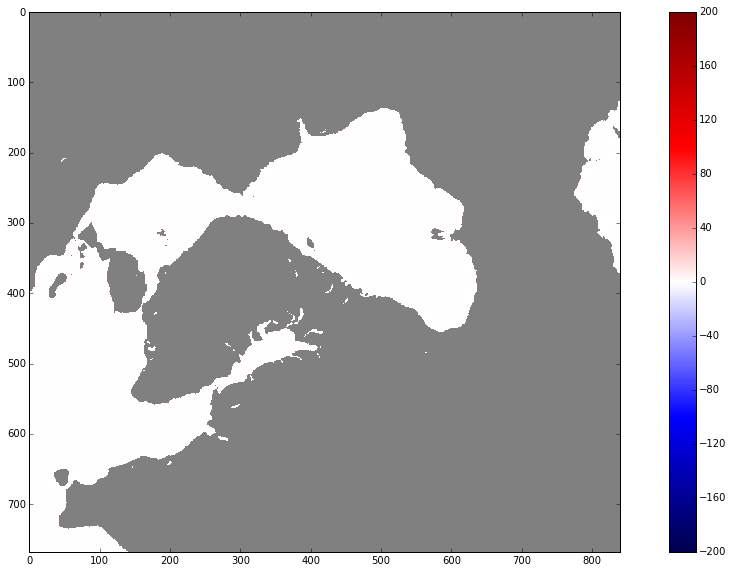

In [48]:
interact(tmp2,matplotlib.cm.seismic,-200,200,-200,200,time1=0,time2=7,z1=0,z2=50)

In [342]:
for j in range(768):
    for k in range(840):
        if np.nanmin(data_9new2.data['S'][1,39,j,k]) < -10:
            print j,k, np.nanmin(data_9new2.data['S'][1,39,j,k])

KeyboardInterrupt: 

In [354]:
for i in range(50):
    print i, np.nanmin(data_9new2.data['S'][5,i,:,:])

0 0.00903981
1 0.217946
2 0.495047
3 0.5663
4 -13.873
5 -18.1086
6 0.487688
7 0.540912
8 0.404388
9 0.61185
10 0.710666
11 1.04086
12 0.655945
13 0.614924
14 0.471667
15 -89.1112
16 -0.0844429
17 2.23355
18 2.4604
19 -47.6568
20 -23.6286
21 -34.232
22 -30.7272
23 -11.911
24 -48.3282
25 -31.2481
26 -19.3539
27 -200.557
28 -93.8112
29 -18.1184
30 -309.326
31 -33.4906
32 -74.89
33 -187.209
34 -38.6299
35 -108.751
36 -27.3474
37 -26.2226
38 -5.35394
39 2.35797
40 2.42429
41 2.24711
42 2.24459
43 2.3266
44 2.2782
45 2.2632
46 2.42451
47 10.0157
48 14.2366
49 34.6793


In [355]:
Writebin

NameError: name 'Writebin' is not defined

In [368]:
class binfiles:
    def __init__(self):
        self.buffersize=8192

    def writeOrg(self,filename,matrix,type='d'):
        # create an array first                                                                                                           
        aMatrix=A.array(type)
        # turn matrix into a flat and then into a list                                                                                    
        # the list is then read into aMatrix                                                                                              
        aMatrix.fromlist(matrix.flat.tolist())
        # open the file                                                                                                                   
        fd=open(filename,'wb')
        aMatrix.tofile(fd)
        fd.close()

    def write(self,filename,matrix):
        # open the file                                                                                                                   
        fd=open(filename,'wb')
        matrix.ravel().tofile(fd)
        fd.close()

    def read(self,filename,size=(0,0)):
        fd=open(filename,'rb')
        buffersize=size[0]*size[1]
        if (buffersize==0) or (buffersize>self.buffersize):
            buffersize=self.buffersize

        while True:
            try:
                matrix.fromfile(fd,buffersize)
            except EOFError:
                break

        fd.close()
        if size[0]*size[1]!=0:
            # size is given                                                                                                               
            matrix=reshape(matrix,size)
        return(matrix)
def writeFile(filename,X):
    bf=binfiles()
    bf.write(filename,X.astype('float32'))


In [369]:
S = data_9.data['S'][0,:,:,:]
writeFile('/noc/users/am8e13/MITgcm_mio/S_frompython3',S)

In [364]:
%savee

(50, 768, 840)

<matplotlib.contour.QuadContourSet instance at 0x2ae5a86c3bd8>

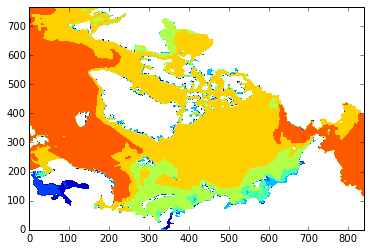

In [365]:
plt.contourf(S[0,:,:])